In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

## `pandas` settings
Make it so that we can see long lists, because we have a lot of potential features.

In [2]:
pd.options.display.max_seq_items = 2000 # default is 100
pd.options.display.max_columns = 250 # default is 20
pd.options.display.max_rows = 250 # default is 20

# Building the random forest model

## Read in training set

We built this dataset in the last notebook, so we just need to read in both the X and Y dataframes.

In [3]:
X = pd.read_csv('processed/x_rf_training.csv', index_col=0)
X.head()

,LOAD_AXLE,NUM_LANES,LOAD_GROSS,MED_WID,SUR_W,SPD_MAX,ROW_W_USL,RB_WID,ACCEL_DECE,S_WID_O,SEC_BIC,S_WID_I,LOAD_TAND,SPD_MIN,ROW_MIN,HOV_LANES,LANE_WIDTH,HP_MED_W,BRDG_STRUC,SURF_TRE_1,CURB_R_0,CURB_R_1,CURB_R_2,CURB_R_3,CURB_R_4,CURB_R_5,HOV_TYP_0,HOV_TYP_1,S_USE_O_0,S_USE_O_1,S_USE_O_2,S_USE_O_3,S_USE_O_4,S_USE_O_5,S_USE_O_6,S_USE_O_7,BASE_TP_0,BASE_TP_1,BASE_TP_3,BASE_TP_4,BASE_TP_5,BASE_TP_6,BASE_TP_7,BASE_TP_9,BASE_TP_10,BASE_TP_11,BASE_TP_14,HWY_STAT_0,HWY_STAT_6,HWY_DES1_0,HWY_DES1_1,HWY_DES1_2,HWY_DES1_3,HWY_DES1_4,HWY_DES1_5,SURF_TREAT_0,SURF_TREAT_1,SURF_TREAT_2,SURF_TREAT_4,SURF_TREAT_5,SURF_TREAT_7,SURF_TREAT_8,SURF_TREAT_9,S_TYPE_O_0,S_TYPE_O_1,S_TYPE_O_2,S_TYPE_O_3,S_TYPE_O_4,S_TYPE_O_5,S_TYPE_O_99,CURB_L_0,CURB_L_1,CURB_L_2,CURB_L_3,CURB_L_4,CURB_L_5,S_TYPE_I_0,S_TYPE_I_1,S_TYPE_I_2,S_TYPE_I_3,S_TYPE_I_4,S_TYPE_I_5,S_TYPE_I_99,DIR_TRAV_0,DIR_TRAV_1,DIR_TRAV_3,DIR_TRAV_4,CLMB_PS_LA_0.0,CLMB_PS_LA_1.0,CLMB_PS_LA_2.0,CLMB_PS_LA_3.0,SRF_TYPE_0,SRF_TYPE_1,SRF_TYPE_2,SRF_TYPE_3,SRF_TYPE_4,SRF_TYPE_5,SRF_TYPE_6,SRF_TYPE_7,SRF_TYPE_9,SRF_TYPE_10,SRF_TYPE_11,SRF_TYPE_13,MED_TYPE_0,MED_TYPE_2,MED_TYPE_3,MED_TYPE_4,MED_TYPE_5,MED_TYPE_6,MED_TYPE_7,MED_TYPE_99,S_USE_I_0,S_USE_I_1,S_USE_I_2,S_USE_I_3,S_USE_I_4,S_USE_I_5,S_USE_I_6,S_USE_I_7,ACES_CTRL_0,ACES_CTRL_1,ACES_CTRL_2,ACES_CTRL_3
FID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,2,0,0,22,75,100,22,0,0,0,0,0,0,100,0.0,11,0,False,0.0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0,2,58420,0,22,55,80,22,0,0,0,0,0,0,80,0.0,11,0,False,0.0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,0,2,0,0,22,50,100,24,0,1,0,1,0,0,100,0.0,11,1,False,0.5,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,0,2,0,0,36,55,100,40,0,2,0,2,0,0,100,0.0,11,2,False,0.0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0,2,58420,0,24,55,100,24,0,0,0,0,0,0,100,0.0,10,0,False,0.0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [4]:
Y = pd.read_csv('processed/y_training.csv', index_col=0)['0']
Y.head()

FID
0       0.000000
1       0.000000
2    1121.459692
3       0.000000
4       0.000000
Name: 0, dtype: float64

In [5]:
X.shape

(140824, 123)

Looks like we have about 140,000 points of training data and 123 features to work with.

## Find best model

In [6]:
n_estimators = [int(x) for x in np.linspace(100, 1000, 10)]
max_features = ['auto', 'sqrt']
max_depth = np.linspace(10, 100, 10)
min_samples_split = [2, 10, 100]
min_samples_leaf = [1, 2, 10]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [7]:
# search 1000 different combos using 3-fold cross validation using all available cores
rfs = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=random_grid, n_iter=800, cv=2, verbose=2, random_state=42, n_jobs=-1)
rfs.fit(X, Y)

Fitting 2 folds for each of 800 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/sparta/miniconda/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 56.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 245.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 568.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 935.0min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 1479.8min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 2216.4min
[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed: 2456.9min finished


RandomizedSearchCV(cv=2, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=800, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]), 'min_samples_split': [2, 10, 100], 'min_samples_leaf': [1, 2, 10], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [8]:
rfs.best_params_

{'n_estimators': 600,
 'min_samples_split': 100,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 10.0,
 'bootstrap': True}

In [9]:
np.save('processed/rf_best_params.npy', rfs.best_params_)

In [10]:
results = pd.DataFrame(rfs.cv_results_).sort_values('rank_test_score')
results[results['rank_test_score']==1].head(100)

/home/sparta/miniconda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/sparta/miniconda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/sparta/miniconda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/sparta/miniconda/lib/python

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
568,37.113652,0.483354,5.75562,0.199803,600,100,10,sqrt,10,True,"{'n_estimators': 600, 'min_samples_split': 100...",-0.007646,0.000607,-0.003519,0.004126,1,0.038407,0.016315,0.027361,0.011046


## Evaluate on test set

### Read in test set

In [11]:
Xtest = pd.read_csv('processed/x_rf_test.csv', index_col=0)
Ytest = pd.read_csv('processed/y_test.csv', index_col=0)['0']
Yspfs = pd.read_csv('predictions/FHWA Model Results.csv', index_col=0)['R-predicted FHWA']
bad_mask = Yspfs.str.contains('#NUM!') | Yspfs.str.contains('#DIV/0!')
Yspfs[bad_mask] = np.nan
Yspfs = Yspfs.astype(np.float64)
Yspfs[bad_mask] = Yspfs.mean()
Yspfs.head()

FID
8.0       0.000000
12.0      0.000000
13.0      0.000000
21.0    198.846103
24.0      0.000000
Name: R-predicted FHWA, dtype: float64

### Evaluate best random forest model on test set and compare against FHWA SPF predictions

In [12]:
Ypred = pd.DataFrame(data=rfs.best_estimator_.predict(Xtest), index=Xtest.index)[0]
rf_error = Ypred - Ytest
spf_error = Yspfs - Ytest
print('               Training RMSE:', np.mean((rfs.best_estimator_.predict(X)-Y)**2))
print('                   Test RMSE:', np.mean(rf_error**2))
print('               FHWA SPF RMSE:', np.mean(spf_error**2))
print('           Training accuracy:', rfs.best_estimator_.score(X,Y))
print('               Test accuracy:', rfs.best_estimator_.score(Xtest,Ytest))
print('           FHWA SPF accuracy:', 1 - ((Yspfs - Ytest) ** 2).sum() / ((Ytest - Ytest.mean()) ** 2).sum())
print('             Crashes/VMT off:', rf_error.sum())
print('Crashes/VMT off cumulatively:', rf_error.abs().sum())

               Training RMSE: 2393501492.265256
                   Test RMSE: 572789300.5944308
               FHWA SPF RMSE: 575964019.1155937
           Training accuracy: 0.04110600635860662
               Test accuracy: -0.0019145243575529047
           FHWA SPF accuracy: -0.007467694770825428
             Crashes/VMT off: 3366338.965649967
Crashes/VMT off cumulatively: 57685202.754208274


/home/sparta/miniconda/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/sparta/miniconda/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


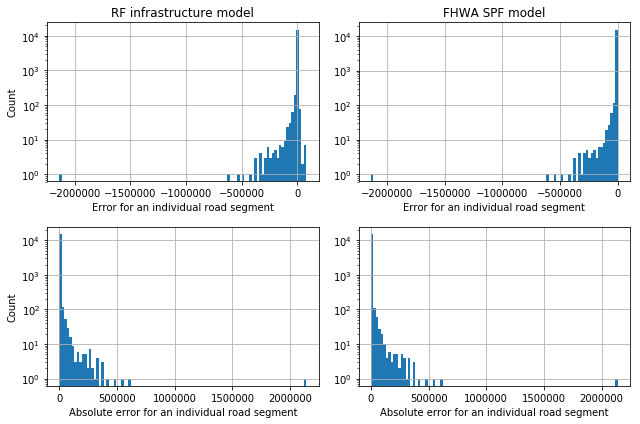

In [13]:
plt.subplots(figsize=(9,6), sharex=True)

plt.subplot(2,2,1)
plt.hist((rf_error), bins=100, log=True)
plt.title('RF infrastructure model')
plt.xlabel('Error for an individual road segment')
plt.ylabel('Count')
plt.grid()

plt.subplot(2,2,2)
plt.hist((spf_error), bins=100, log=True)
plt.title('FHWA SPF model')
plt.xlabel('Error for an individual road segment')
# plt.ylabel('Count')
plt.grid()

plt.subplot(2,2,3)
plt.hist(np.abs(rf_error), bins=100, log=True)
# plt.title('RF infrastructure model')
plt.xlabel('Absolute error for an individual road segment')
plt.ylabel('Count')
plt.grid()

plt.subplot(2,2,4)
plt.hist(np.abs(spf_error), bins=100, log=True)
# plt.title('FHWA SPF model')
plt.xlabel('Absolute error for an individual road segment')
# plt.ylabel('Count')
plt.grid()

plt.tight_layout()
plt.savefig('figures/errors.png',dpi='figure')
plt.show()

### Check biggest outlier

We have one road segment where our RF crash rate predicition is way off from the true crash rate. Why is that?

In [14]:
np.abs(rf_error).max(skipna=True)

2138853.770865498

In [15]:
i = np.abs(rf_error).idxmax(skipna=True)
i

146858

In [16]:
Ytest[i]

2140410.958904109

In [17]:
Ypred[i]

1557.1880386107805

There's also one b the SPF. Is it the same index? What did the SPFs predict instead?

In [18]:
np.abs(spf_error).idxmax(skipna=True)

146858.0

In [19]:
Yspfs[i]

0.0

Turns out it's because both the true crash rate is very small, skewing the division.

### Output results

In [20]:
Ytest.to_csv('predictions/rf_best_guess.csv')

/home/sparta/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


## Measuring feature importance

We measure the relative importance of our features by how often decision trees in our random forest split based on the value in that column.

In [21]:
dfimp = pd.DataFrame({
    'Importance': rfs.best_estimator_.feature_importances_,
    'Features': X.columns
}).set_index('Features')
dfimp = dfimp.sort_values('Importance', ascending=False)
dfimp.head(10)

,Importance
Features,
SPD_MAX,0.101947
SRF_TYPE_2,0.087850
RB_WID,0.087849
SUR_W,0.081592
ROW_W_USL,0.062321
HP_MED_W,0.058347
ROW_MIN,0.056672
NUM_LANES,0.055376
MED_WID,0.039657


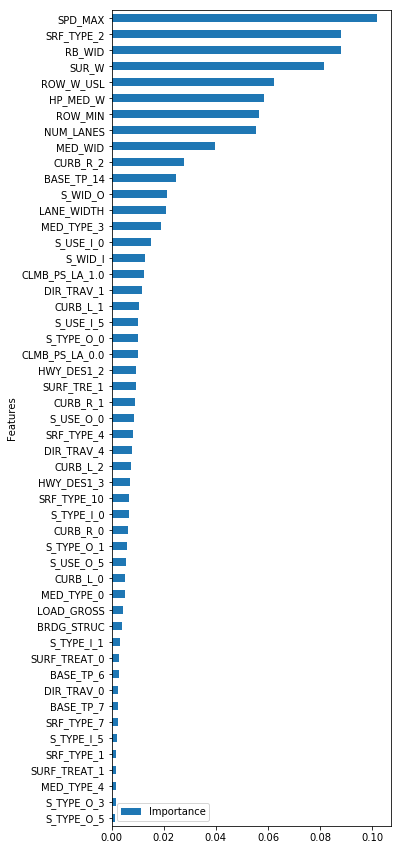

In [22]:
# plot the highest 50 entries
dfimp[50:None:-1].plot(figsize=(5,15),kind='barh')
plt.savefig('figures/weights_best.png',dpi='figure')
plt.show()

### Grouping features

Many features are slightly different but can be bucketed into the same category.

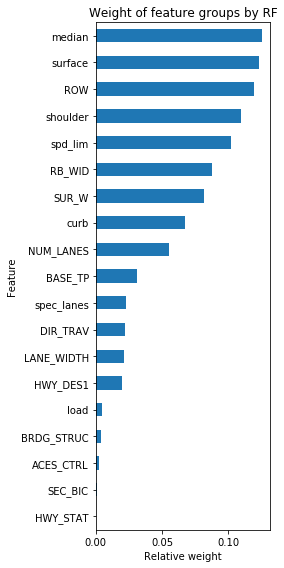

In [23]:
one_hot_to_orig = np.load("processed/one_hot_dict.npy", allow_pickle=True).item()
col_groups = np.load("processed/col_groups.npy", allow_pickle=True).item()

hist_dict = {}
for i,v in dfimp['Importance'].iteritems():
    ft = i
    
    # check if current feature was a one hot column and track it back to unhot column name
    if ft in one_hot_to_orig:
        ft = one_hot_to_orig[ft]
            
    # check if current feature is part of a group of similar columns, and track it back to that group's name
    if ft in col_groups:
        ft = col_groups[ft]
    
    # create a new entry in the dict for the current feature if there wasn't one
    if ft not in hist_dict:
        hist_dict[ft] = 0
    
    hist_dict[ft] += v

pd.Series(hist_dict).sort_values(ascending=True).plot(figsize=(4,8),kind='barh')
plt.ylabel('Feature')
plt.xlabel('Relative weight')
plt.title('Weight of feature groups by RF')
plt.tight_layout()
plt.savefig('figures/weights_grouped_best.png',dpi='figure')
plt.show()

### Highly ranked features among many forests

If we had a bunch of parameters that performed equally well, we could use this to check which features they all said were important. Let's check how they weighted different features as well and average them all.

In [24]:
# dfavgimp = pd.DataFrame({
#     'Importance': np.zeros(len(X.columns)),
#     'Features': X.columns
# }).set_index('Features')
# best_params_list = results[results['rank_test_score']==1]['params']
# if len(best_params_list>100):
#     best_params_list = best_params_list[0:100]
# for params in best_params_list:
#     rf = RandomForestRegressor(**params)
#     rf.fit(X,Y)
#     df_this_imp = pd.DataFrame({
#         'Importance': rf.feature_importances_,
#         'Features': X.columns
#     }).set_index('Features')
#     dfavgimp += df_this_imp
# dfavgimp /= len(best_params_list)
# dfavgimp = dfavgimp.sort_values('Importance', ascending=False)
# dfavgimp.head(10)

In [25]:
# dfavgimp[:20].plot(kind='bar', legend=None)
# plt.ylabel('Importance')
# plt.savefig('figures/weights_avg.png',dpi='figure')
# plt.show()